In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, roc_curve

# Downloading the Dataset

Dataset was downloaded from : https://datahub.io/machine-learning/covertype

In [8]:
# Loading the covertype dataset
data = pd.read_csv('covertype_csv.csv')

In [9]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,0.368684,0.141667,0.045455,0.184681,0.223514,0.071659,0.870079,0.913386,0.582677,0.875366,...,0,0,0,0,0,0,0,0,0,5
1,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.594488,0.867838,...,0,0,0,0,0,0,0,0,0,5
2,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339,...,0,0,0,0,0,0,0,0,0,2
3,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886,...,0,0,0,0,0,0,0,0,0,2
4,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.590551,0.860449,...,0,0,0,0,0,0,0,0,0,5


**Data Set Information:**

Predicting forest cover type from cartographic variables only (no remotely sensed data). The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data. Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types).

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

Some background information for these four wilderness areas: Neota (area 2) probably has the highest mean elevational value of the 4 wilderness areas. Rawah (area 1) and Comanche Peak (area 3) would have a lower mean elevational value, while Cache la Poudre (area 4) would have the lowest mean elevational value.

As for primary major tree species in these areas, Neota would have spruce/fir (type 1), while Rawah and Comanche Peak would probably have lodgepole pine (type 2) as their primary species, followed by spruce/fir and aspen (type 5). Cache la Poudre would tend to have Ponderosa pine (type 3), Douglas-fir (type 6), and cottonwood/willow (type 4).

The Rawah and Comanche Peak areas would tend to be more typical of the overall dataset than either the Neota or Cache la Poudre, due to their assortment of tree species and range of predictive variable values (elevation, etc.) Cache la Poudre would probably be more unique than the others, due to its relatively low elevation range and species composition.

**Attribute Information:**

Given is the attribute name, attribute type, the measurement unit and a brief description. The forest cover type is the classification problem. The order of this listing corresponds to the order of numerals along the rows of the database.

Name / Data Type / Measurement / Description

- Elevation / quantitative /meters / Elevation in meters
- Aspect / quantitative / azimuth / Aspect in degrees azimuth
- Slope / quantitative / degrees / Slope in degrees
- Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway
- Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice
- Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice
- Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation
- Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
- Class (7 types) / integer / 1 to 7 / Forest Cover Type designation

# Data Exploration

In [10]:
# Number of Instances
data.shape[0]

581012

In [11]:
# Number of attributes
data.shape[1]

55

In [12]:
# Number of classes
len(data['class'].unique())

7

Code of class label with name of class

- 1 -- Spruce/Fir
- 2 -- Lodgepole Pine
- 3 -- Ponderosa Pine
- 4 -- Cottonwood/Willow
- 5 -- Aspen
- 6 -- Douglas-fir
- 7 -- Krummholz

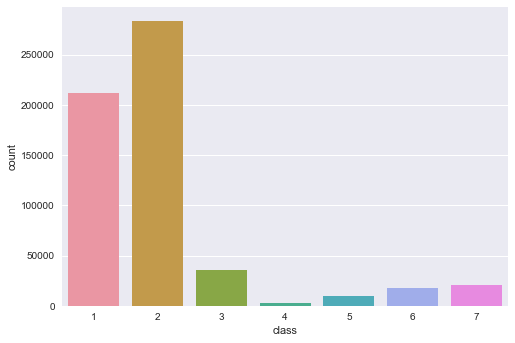

In [13]:
# Class Distribution
sns.countplot(data['class'])

In [14]:
# Statistical summary
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,0.550458,0.432380,0.213693,0.192862,0.283487,0.330216,0.835221,0.879208,0.561135,0.276076,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,0.140062,0.310871,0.113458,0.152147,0.075317,0.219089,0.105393,0.077830,0.150687,0.184608,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.475238,0.161111,0.136364,0.077309,0.232558,0.155403,0.779528,0.838583,0.468504,0.142758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.568784,0.352778,0.196970,0.156049,0.262274,0.280596,0.858268,0.889764,0.562992,0.238394,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.652326,0.722222,0.272727,0.274875,0.312661,0.467613,0.909449,0.933071,0.661417,0.355500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


# Data Pre-processing

In [15]:
# Checking for missing values
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


No missing values in the dataset

In [16]:
data['class'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: class, dtype: int64

In [17]:
# Converting Multiclass classification to binary classification
# Labelling Category 2 as '1' and rest others as '0' to reduce skewness in class

data['class'] = data['class'].apply(lambda x: 1 if x==2 else 0)

In [18]:
data['class'].value_counts()

0    297711
1    283301
Name: class, dtype: int64

In [19]:
# Create correlation matrix
corr_matrix = data.drop('class', axis=1).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
data.drop(to_drop, axis=1, inplace=True)

In [20]:
# Splitting data into training, validation & testing sets

train, valid, test = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])

print("Train set size : ", train.shape)
print("Validation set size : ", valid.shape)
print("Test set size : ", test.shape)

X_train = train.drop('class', axis=1)
y_train = train['class'].values

X_val = valid.drop('class', axis=1)
y_val = valid['class'].values

X_test = test.drop('class', axis=1)
y_test = test['class'].values

Train set size :  (348607, 55)
Validation set size :  (116202, 55)
Test set size :  (116203, 55)


# Classification

In [21]:
# Decision tree Model

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
# Naive Bayes model

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [23]:
# Random Forest Model

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

# Evaluation

Decision tree model

In [24]:
# Confusion Matrix and Classification Report on Validation set

preds = dt.predict(X_val)
print("Error Rate % :", 1-accuracy_score(y_val, preds))
print(classification_report(y_val, preds))

Error Rate % : 0.05701278807593668
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     59681
           1       0.94      0.94      0.94     56521

    accuracy                           0.94    116202
   macro avg       0.94      0.94      0.94    116202
weighted avg       0.94      0.94      0.94    116202



In [25]:
# Confusion Matrix and Classification Report on Test set

preds = dt.predict(X_test)
print("Error Rate % :", 1-accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

Error Rate % : 0.057433973305336394
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     59437
           1       0.94      0.94      0.94     56766

    accuracy                           0.94    116203
   macro avg       0.94      0.94      0.94    116203
weighted avg       0.94      0.94      0.94    116203



Naive Bayes model

In [26]:
# Confusion Matrix and Classification Report on Validation set

preds = nb.predict(X_val)
print("Error Rate % :", 1-accuracy_score(y_val, preds))
print(classification_report(y_val, preds))

Error Rate % : 0.38642192044887347
              precision    recall  f1-score   support

           0       0.91      0.27      0.42     59681
           1       0.56      0.97      0.71     56521

    accuracy                           0.61    116202
   macro avg       0.73      0.62      0.57    116202
weighted avg       0.74      0.61      0.56    116202



In [27]:
# Confusion Matrix and Classification Report on Test set

preds = nb.predict(X_test)
print("Error Rate % :", 1-accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

Error Rate % : 0.38444790581998745
              precision    recall  f1-score   support

           0       0.91      0.28      0.42     59437
           1       0.56      0.97      0.71     56766

    accuracy                           0.62    116203
   macro avg       0.74      0.62      0.57    116203
weighted avg       0.74      0.62      0.56    116203



Random Forest Model

In [28]:
# Confusion Matrix and Classification Report on Validation set

preds = rf.predict(X_val)
print("Error Rate % :", 1-accuracy_score(y_val, preds))
print(classification_report(y_val, preds))

Error Rate % : 0.04394932961566922
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     59681
           1       0.95      0.97      0.96     56521

    accuracy                           0.96    116202
   macro avg       0.96      0.96      0.96    116202
weighted avg       0.96      0.96      0.96    116202



In [29]:
# Confusion Matrix and Classification Report on Test set

preds = rf.predict(X_test)
print("Error Rate % :", 1-accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

Error Rate % : 0.043294923538979235
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     59437
           1       0.95      0.97      0.96     56766

    accuracy                           0.96    116203
   macro avg       0.96      0.96      0.96    116203
weighted avg       0.96      0.96      0.96    116203



Comparision of Classification models

In [32]:
# Storing the predicted probabilities
dt_proba = dt.predict_proba(X_test)[:, 1]
nb_proba = nb.predict_proba(X_test)[:, 1]
rf_proba = rf.predict_proba(X_test)[:, 1]

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, dt_proba, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, nb_proba, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, rf_proba, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

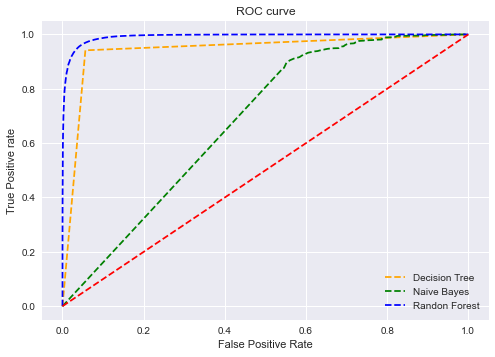

In [33]:
# plotting roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='Randon Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();